In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train_data.csv')

In [3]:
train.shape

(75055, 7)

In [4]:
train.head()

,Unnamed: 0,Theme,Paragraph,Question,Answer_possible,Answer_text,Answer_start
0,2,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,True,['2003'],[526]
1,6,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What album made her a worldwide known artist?,True,['Dangerously in Love'],[505]
2,7,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,Who managed the Destiny's Child group?,True,['Mathew Knowles'],[360]
3,8,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyoncé rise to fame?,True,['late 1990s'],[276]
4,9,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What role did Beyoncé have in Destiny's Child?,True,['lead singer'],[290]


<AxesSubplot: xlabel='Answer_possible', ylabel='count'>

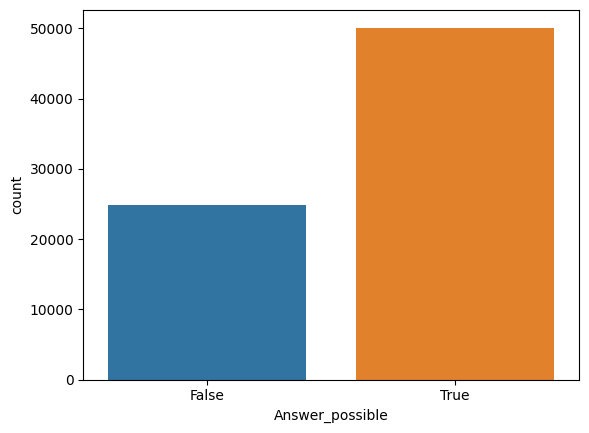

In [5]:
sns.countplot(x="Answer_possible", data=train)

In [6]:
train.Theme.value_counts()

Queen_Victoria                                    607
New_York_City                                     563
American_Idol                                     525
Beyoncé                                           523
Frédéric_Chopin                                   490
                                                 ... 
Digestion                                          56
Animal                                             53
Letter_case                                        42
Race_and_ethnicity_in_the_United_States_Census     38
Pitch_(music)                                      22
Name: Theme, Length: 361, dtype: int64

<AxesSubplot: xlabel='Theme', ylabel='count'>

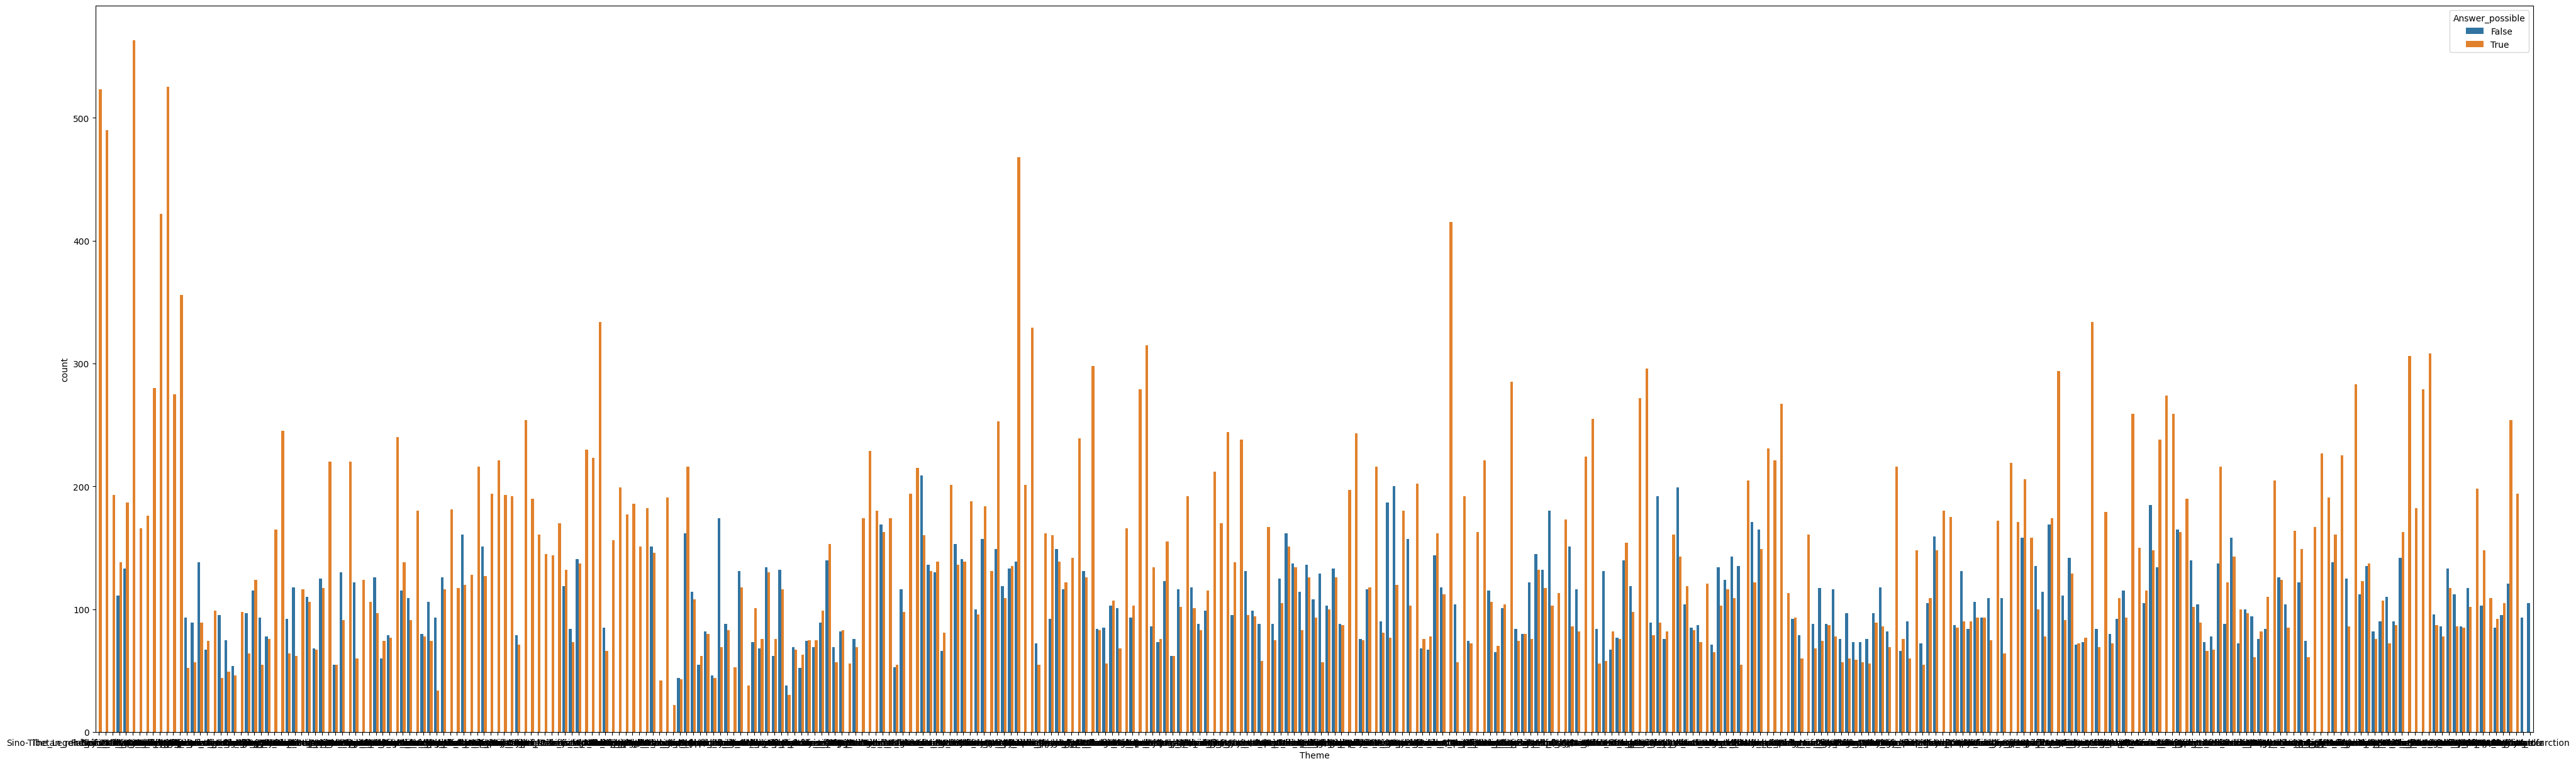

In [7]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(50, 15))
sns.countplot(x="Theme", data=train, hue='Answer_possible',ax=axes)

In [8]:
df=train.groupby(["Theme"])["Answer_possible"].value_counts()
df=pd.DataFrame(df)
df

Answer_possible
Theme                            Answer_possible                 
2008_Summer_Olympics_torch_relay True                         356
ASCII                            True                          83
                                 False                         82
A_cappella                       False                        122
                                 True                          76
...                                                           ...
Yale_University                  True                         151
YouTube                          True                         123
                                 False                        112
Zhejiang                         True                         132
                                 False                        119

[591 rows x 1 columns]

In [9]:
pd.isna(train).sum()

Unnamed: 0         0
Theme              0
Paragraph          0
Question           0
Answer_possible    0
Answer_text        0
Answer_start       0
dtype: int64

In [10]:
pd.isnull(train).sum()

Unnamed: 0         0
Theme              0
Paragraph          0
Question           0
Answer_possible    0
Answer_text        0
Answer_start       0
dtype: int64

In [13]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''

theme="Animal" # you can choose any theme from here and see the corresponding wordcloud
df=train[train['Theme']==	theme]

for val in df.Paragraph:
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()